In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'fractal_dimension'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：价格分形维度因子  
因子定义：   
$$
 \frac{(1+ln(max_{(t-\delta_t,t)}-min_{(t-\delta_t,t)}))}{(1+ln(max_{(t-2\delta_t,t-\delta_t)}-min_{(t-2\delta_t,t-\delta_t)}))} 
$$

在时间窗口delta_t内计算本期价格price的max、min和上一期的max、min。
$$ max_{(t-\delta_t,t)} = max(price_t,price_{t-1},...,price_{t-\delta_t+1}))$$
$$ min_{(t-\delta_t,t)} = min(price_t,price_{t-1},...,price_{t-\delta_t+1}))$$

$$ max_{(t-2\delta_t,t-\delta_t)} = max_{(t-\delta_t-1,t-1)}
$$ 
$$ min_{(t-2\delta_t,t-\delta_t)} = min_{(t-\delta_t-1,t-1)}
$$
此处，前后两期的时间窗口是重叠的，即只移动了1个时间单位
$$
factor = \frac{1+ln(max_{(t-\delta_t,t)}-min_{(t-\delta_t,t)})}{1+ln(max_{(t-2\delta_t,t-\delta_t)}-min_{(t-2\delta_t,t-\delta_t)})}
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : fractal_dimension
fields : ['close']
other_dIepend_factors : None
calc_params : {'delta_period': 5}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-506.66652142590954, 486.83319767352447]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

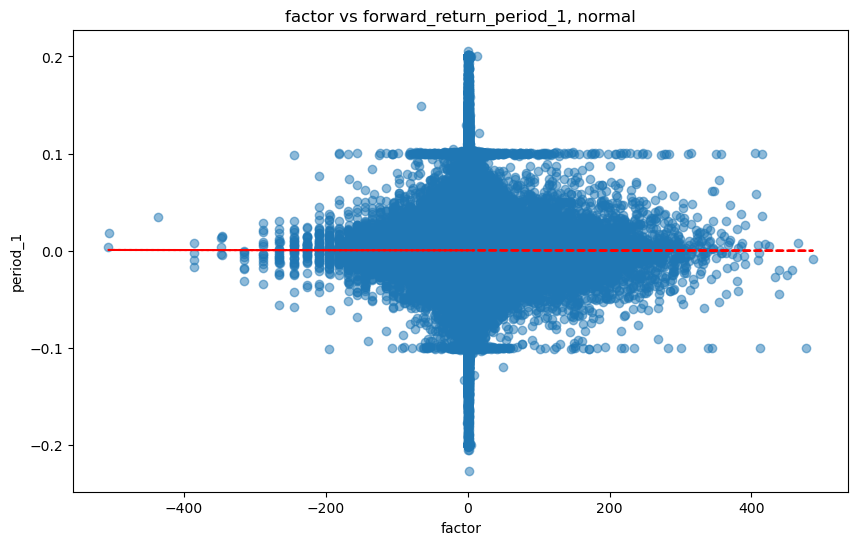

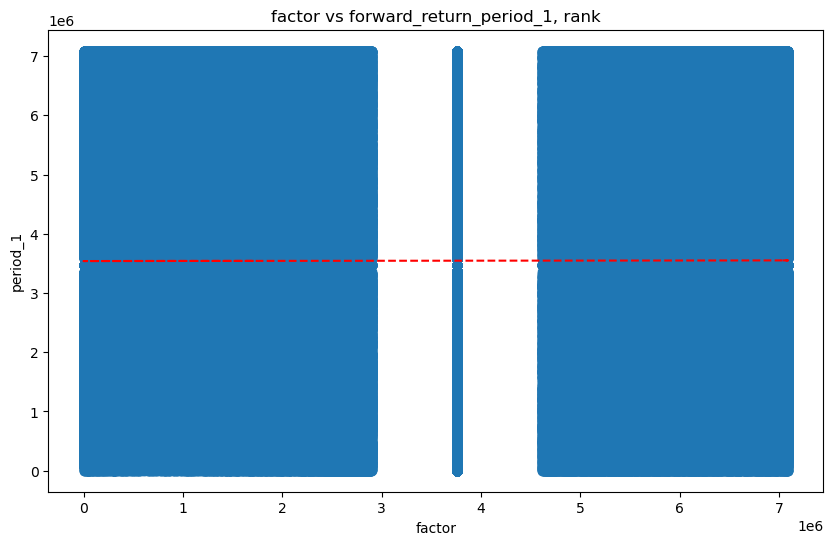

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

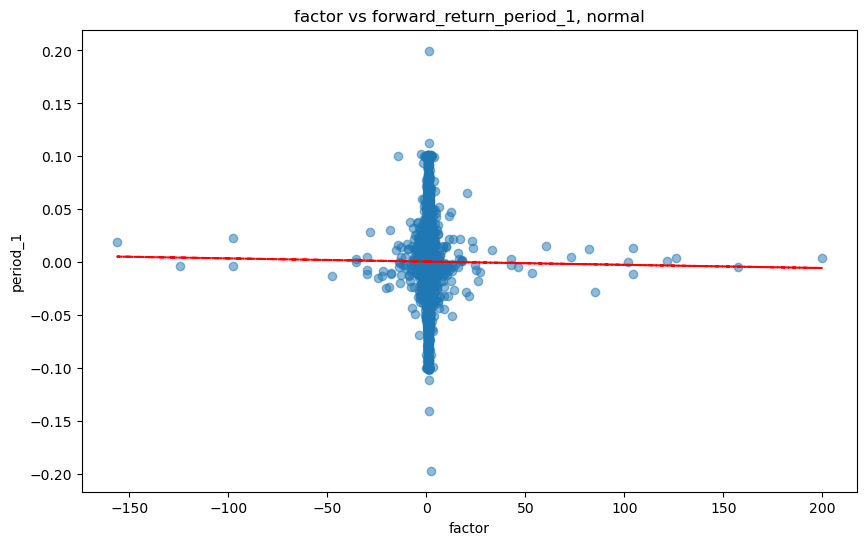

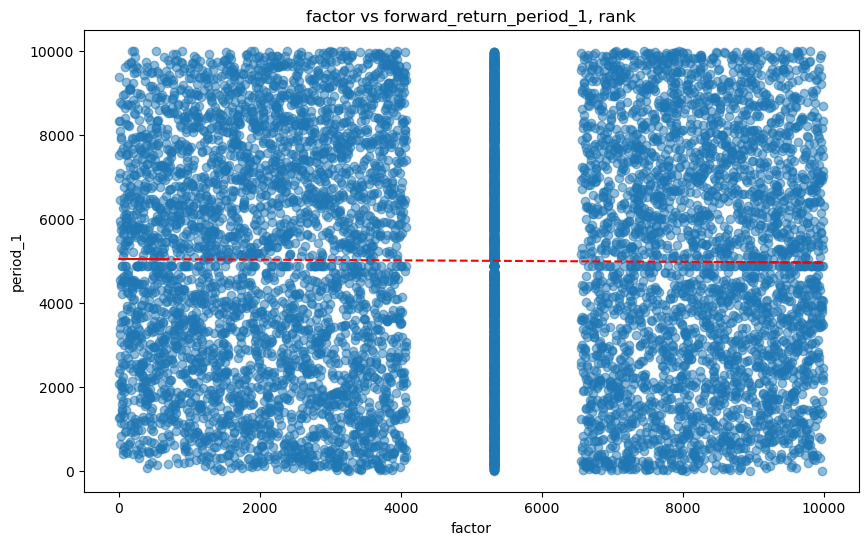

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

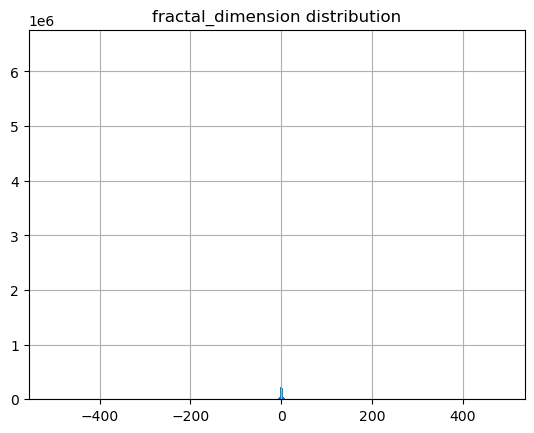

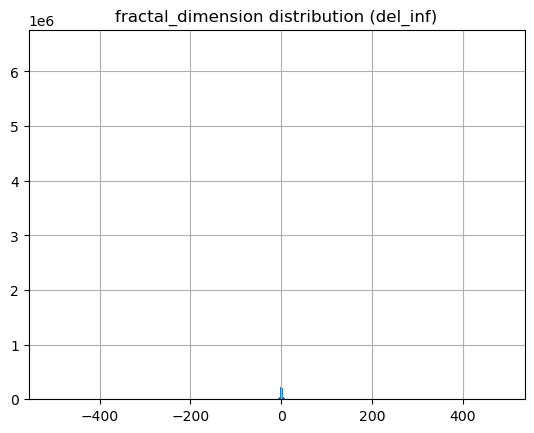

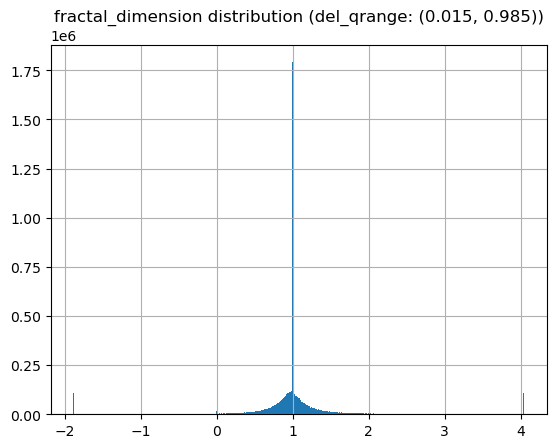

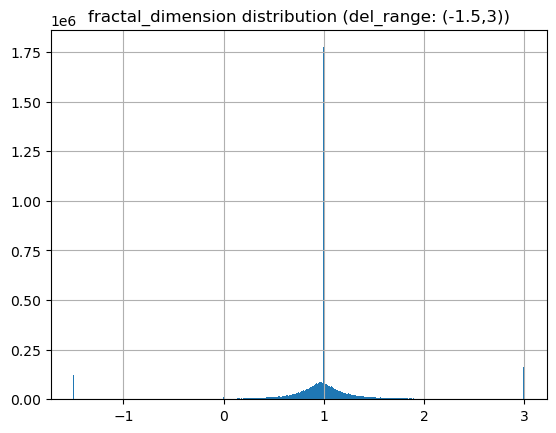

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.015,0.985))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-1.5,3))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean         -0.000297 -0.000549 -0.000901 -0.001416 -0.000763   
norm_ic_std           0.024082  0.024455  0.023722  0.023488  0.023287   
norm_ic_0.02_percent  0.300673  0.289828  0.284966  0.293194  0.278983   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir              -0.012317 -0.022469 -0.037999 -0.060282  -0.03277   
norm_abs_ic          -0.000144 -0.000573 -0.001121 -0.000861 -0.000029   
rank_ic_mean         -0.009044 -0.008844 -0.008118 -0.008956 -0.004487   
rank_ic_std           0.072437  0.072615  0.070874  0.069856  0.068825   
rank_ic_0.02_percent  0.726253  0.744577   0.73635  0.721391  0.728497   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir              -0.124859 -0.121794 -0.114548 -0.128211 -0.065188   
rank_abs_ic           0.001539 -0.003804 -0.005971 -0.004122  0.000937   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

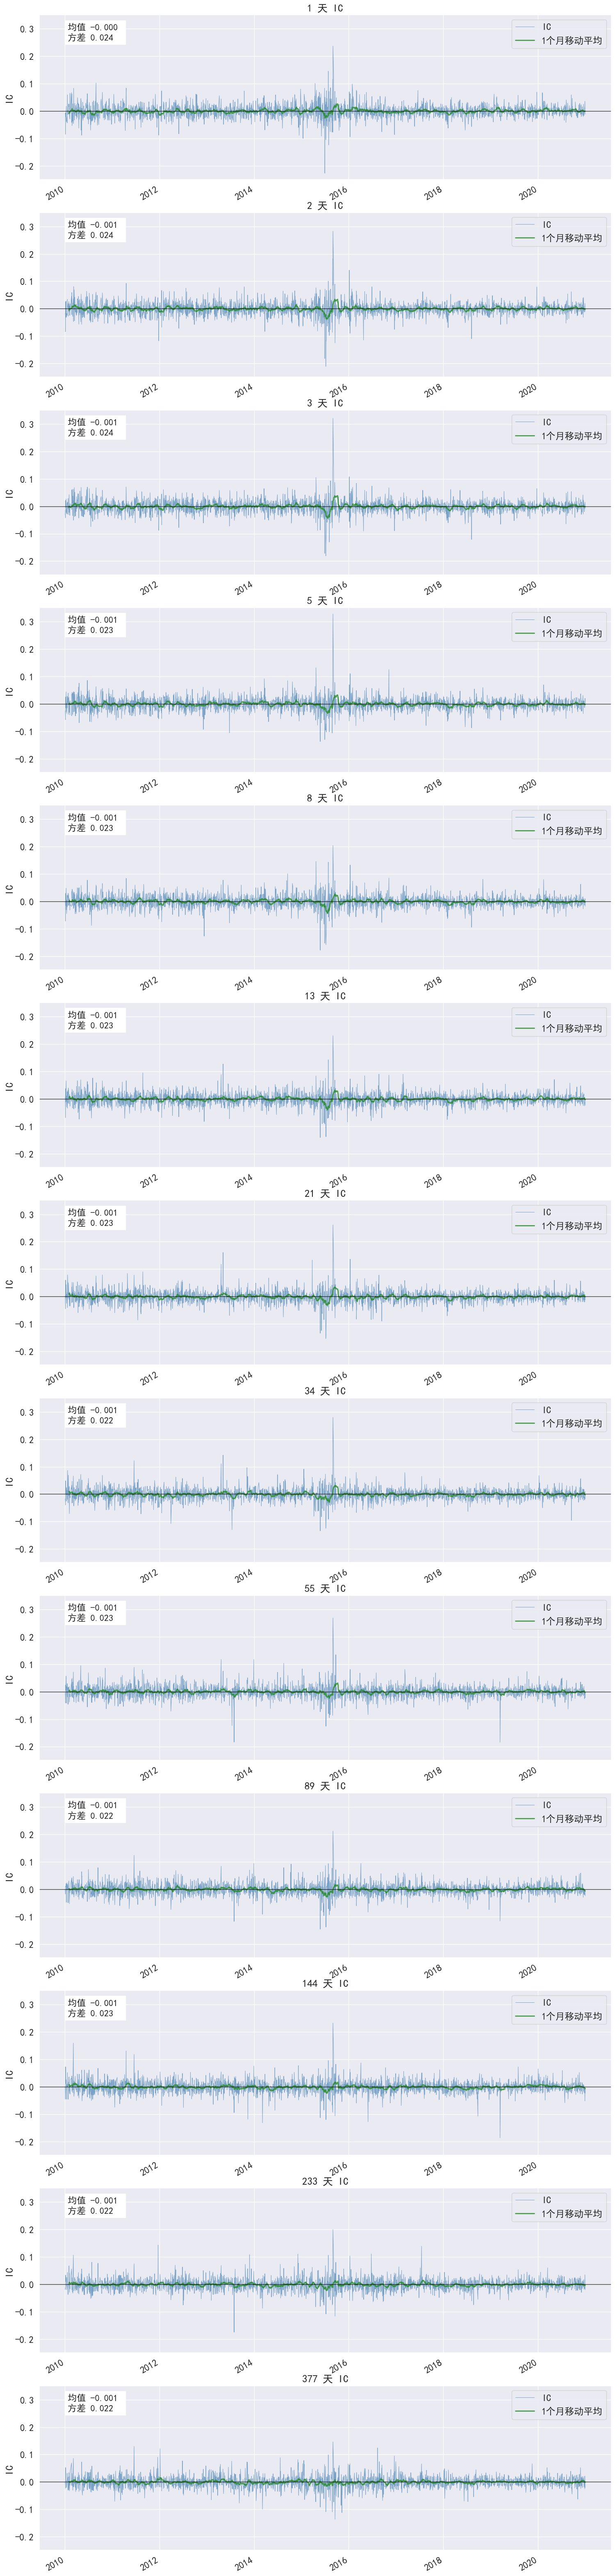

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

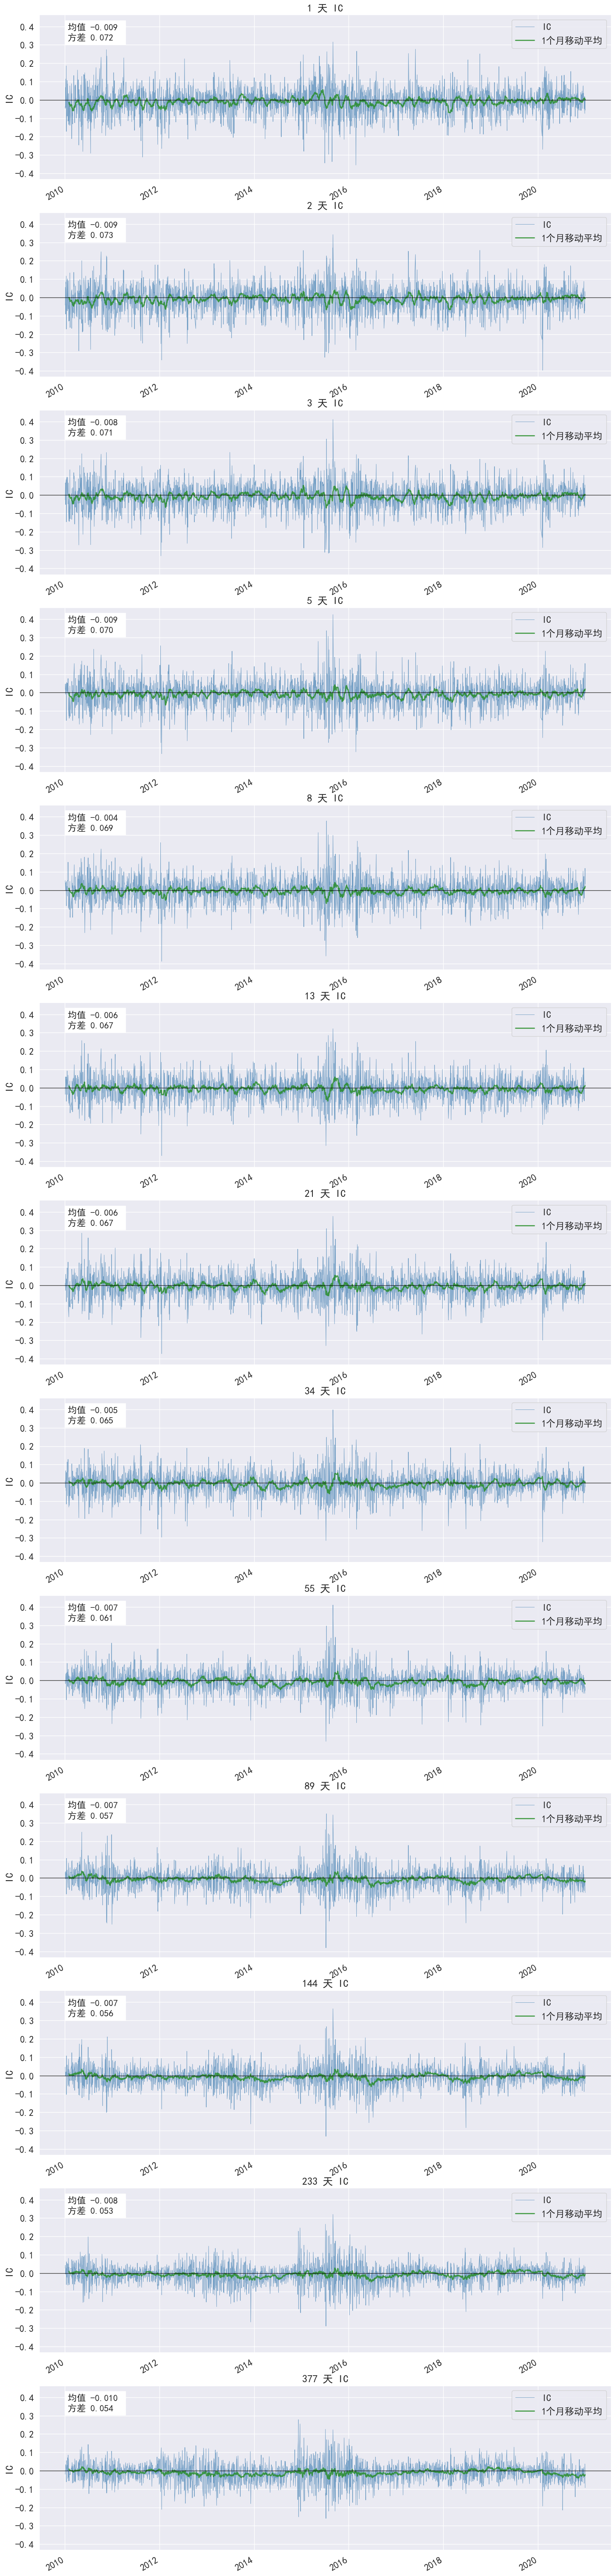

In [13]:
zy_fa.plot_rank_ic_ts()